
# Modelos "Ensemble"


https://lightgbm.readthedocs.io/en/v3.3.2/


### Nossa tarefa é analisar o conjunto de dados e prever se a renda de um adulto excederá 50K/ano ou não.



### Classificador:  

    Analisaremos uma base de dados de salários disponível no UCI Machine Learning.

    Source: [UCI](https://archive.ics.uci.edu/ml/datasets/Adult) - 1996-05-01 . 


    A base de dados com 15 colunas e 48.842 linhas (Adult Salary Dataset).



In [5]:
#Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing

# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sb 
from pandas.plotting import scatter_matrix

# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm




# !pip install lightgbm

# !pip install xgboost

# import pandas as Series, DataFrame

import lightgbm as lgb

import shap



import xgboost as xgb

In [6]:
import pandas as Series 

In [7]:
import lightgbm as lgbm

import xgboost as xgb

Listing of attributes:

    income: >50K, <=50K.
    age: continuous.
    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    fnlwgt: continuous.
    education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    education-num: continuous.
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    sex: Female, Male.
    capital-gain: continuous.
    capital-loss: continuous.
    hours-per-week: continuous.
    native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [8]:
#load the dataset direto do github
# salary = pd.read_csv('https://raw.githubusercontent.com/llSourcell/Best-Programming-Languages-for-Machine-Learning/master/adults.txt',sep=',')

#load the dataset 
salary = pd.read_csv('../Datasets/adult.csv')
salary.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
salary

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
# salary dataset info to find columns and count of the data 
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [11]:
# Verificando a existencia de valores ausentes(missing)

salary.isnull().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [12]:
# Olhando com mais cuidado os valores ausentes!!! 

In [13]:
salary.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,25,38,28,44,18,34,29,63,24,55
workclass,Private,Private,Local-gov,Private,?,Private,?,Self-emp-not-inc,Private,Private
fnlwgt,226802,89814,336951,160323,103497,198693,227026,104626,369667,104996
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college,10th,HS-grad,Prof-school,Some-college,7th-8th
educational-num,7,9,12,10,10,6,9,15,10,4
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married,Never-married,Never-married,Married-civ-spouse,Never-married,Married-civ-spouse
occupation,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,?,Other-service,?,Prof-specialty,Other-service,Craft-repair
relationship,Own-child,Husband,Husband,Husband,Own-child,Not-in-family,Unmarried,Husband,Unmarried,Husband
race,Black,White,White,Black,White,White,Black,White,White,White
gender,Male,Male,Male,Male,Female,Male,Male,Male,Female,Male


     Quando avaliamos as categorias do gráfico acima da variável workclass encontramos a categoria '?'. 
     
     Não encontramos missings na avaliação inicial das variáveis, mas encontramos esse caracter.
     Fazendo uma verificação para as variáveis categoricas.
     Encontramos:

In [14]:
# code will replace the special character to nan and then drop the columns 
# salary['workclass'] = salary['workclass'].replace('?',np.nan)
# salary['native-country'] =salary['native-country'].replace('?',np.nan)
# salary['occupation'] = salary['occupation'].replace('?',np.nan)


#dropping the NaN rows now 
# salary.dropna(how='any',inplace=True)


In [15]:
# Verificando a existencia de valores ausentes(missing)

salary.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

    Uma opção pode ser excluirmos as observações com missings.
    Outra opção é não trabalharmos com essas variáveis
    Outra opção é usar o missing como uma opção de categoria  

    Optamos pela terceira opção

In [16]:
# informações das variaveis quantitativas

salary.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


In [17]:
# Uma variável é a variável target: "income" : renda anual 

salary.income.value_counts()  


(salary.income.value_counts() / salary.shape[0]) * 100

<=50K    76.071823
>50K     23.928177
Name: income, dtype: float64

    A base disponibilizada para realizar o aprendizado apresenta duas classes: <=50K e >50K  

    A variável target income está no formato categórica, vamos criar uma nova variável transformando a variável 
    target em númerica

    Há várias opções de fazer essa transformação: vamos usar a função "map"

In [18]:
 
#mapping the data into numerical data using map function
salary['income'] = salary['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [19]:
# Label Encoding da variável target
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# le=LabelEncoder()
# le.fit(salary.income)


In [20]:
salary['income']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

    As análises a seguir sempre usaremos a variável target "Income" 

    Vamos analisar as demais variáveis para selecionar quais são as variáveis preditoras plusíveis para utilizar no algoritmo

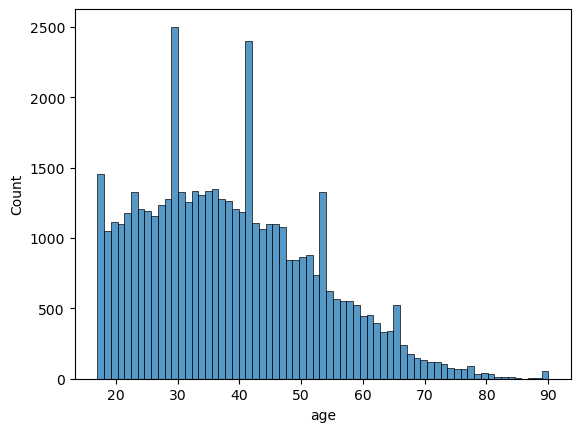

In [21]:
# Verificando a variável Age

sb.histplot(data=salary, x="age");

    Quando estamos trabalhando com técnicas supervisionadas precisamos avaliar as variáveis preditoras 
    sempre verificando sua disribuição separadamente entre as classes.

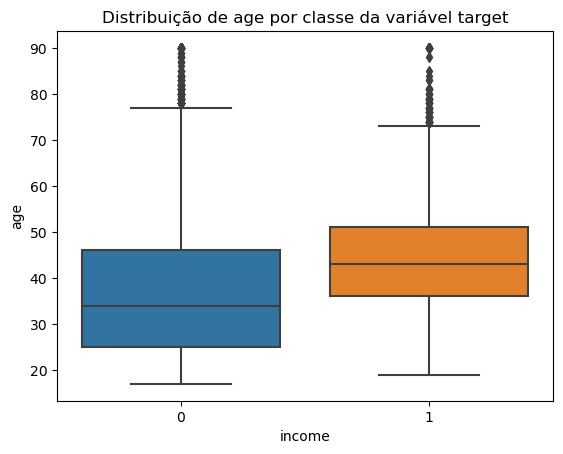

In [22]:
# Variável age(idade)  com a variável target  (Objetivo)
import matplotlib.pyplot as plt  
sb.boxplot(x='income', y='age', data=salary)
plt.title('Distribuição de age por classe da variável target')
plt.show()

In [23]:
# Transformando a variável "age" em  categorias

age_cat = []
for dados in salary['age']:
    if dados <= 30:
        age_cat.append('0')
    elif dados <= 45:
        age_cat.append('1')
    else:
        age_cat.append("2")#atribuindo a nova variavel ao conjunto de dados
salary['age_cat'] = age_cat
#resultado
salary.head().T
# mudar o formato da variável  
salary['age_cat'] = salary['age_cat'].astype(int)

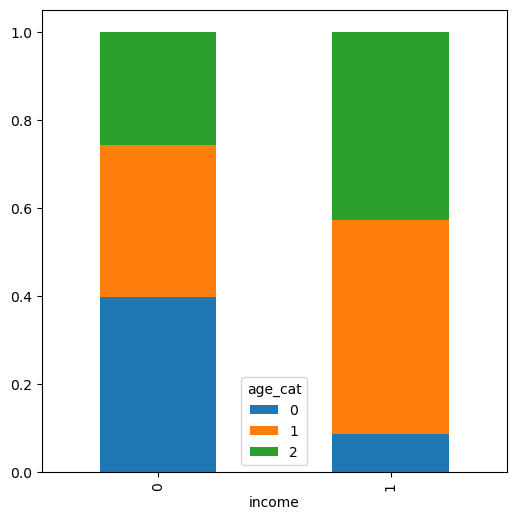

In [24]:
# comparison between age_cat and target

Age_cat = pd.crosstab(salary['income'],salary['age_cat'])
Age_cat.div(Age_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

Podemos verificar pelo boxplot acima da  variável idade  por classe que a classe >50K apresenta medidas de posição  superior que as encontradas na classe <50K.

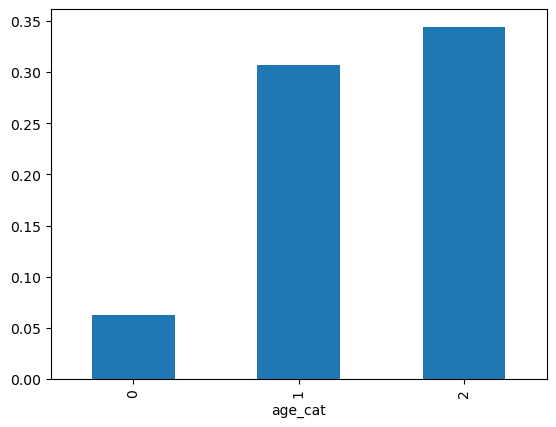

In [25]:
#plotting a bar graph for age_cat  against Income to see the co-relation between these columns 
salary.groupby('age_cat').income.mean().plot(kind='bar');


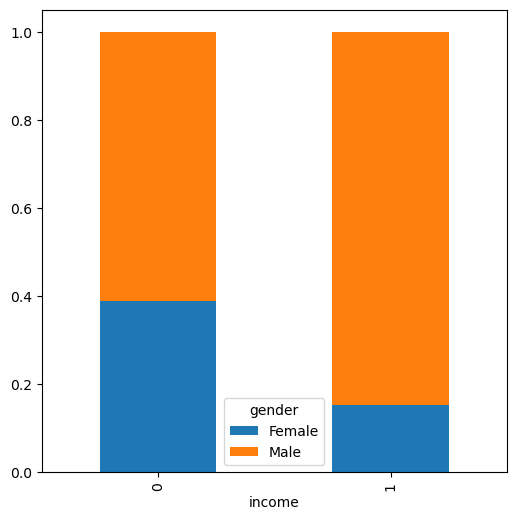

In [26]:
# comparison between Sexo and target

Gender = pd.crosstab(salary['income'],salary['gender'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

Podemos verificar pelo gráfico acima que na classe >50K encontramos maior penetração de indivíduos do sexo masculino, em comparação a classe <=50K.

Nem todo algoritmo podemos trabalhar com variáveis preditoras categóricas, 
assim vamos fazer transformações de variáveis: deixando variáveis categóricas em numéricas.

In [27]:
# Transformando a variável categórica em tipo Dummy

#gender
salary['Male'] = salary['gender'].map({'Male': 1, 'Female': 0}).astype(int)

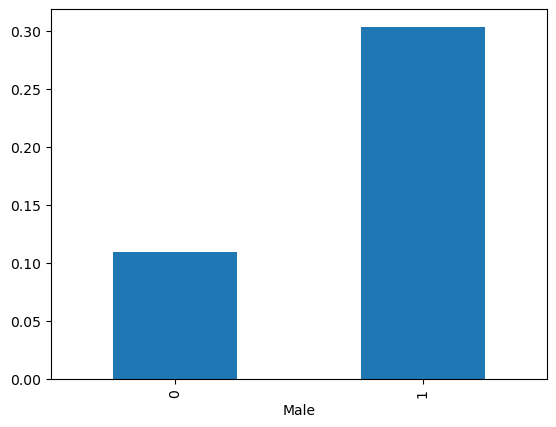

In [28]:
#plotting a bar graph for Sex against Income to see the co-relation between these columns 
salary.groupby('Male').income.mean().plot(kind='bar');

In [29]:
salary.head().T

,0,1,2,3,4
age,25,38,28,44,18
workclass,Private,Private,Local-gov,Private,?
fnlwgt,226802,89814,336951,160323,103497
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college
educational-num,7,9,12,10,10
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
occupation,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,?
relationship,Own-child,Husband,Husband,Husband,Own-child
race,Black,White,White,Black,White
gender,Male,Male,Male,Male,Female


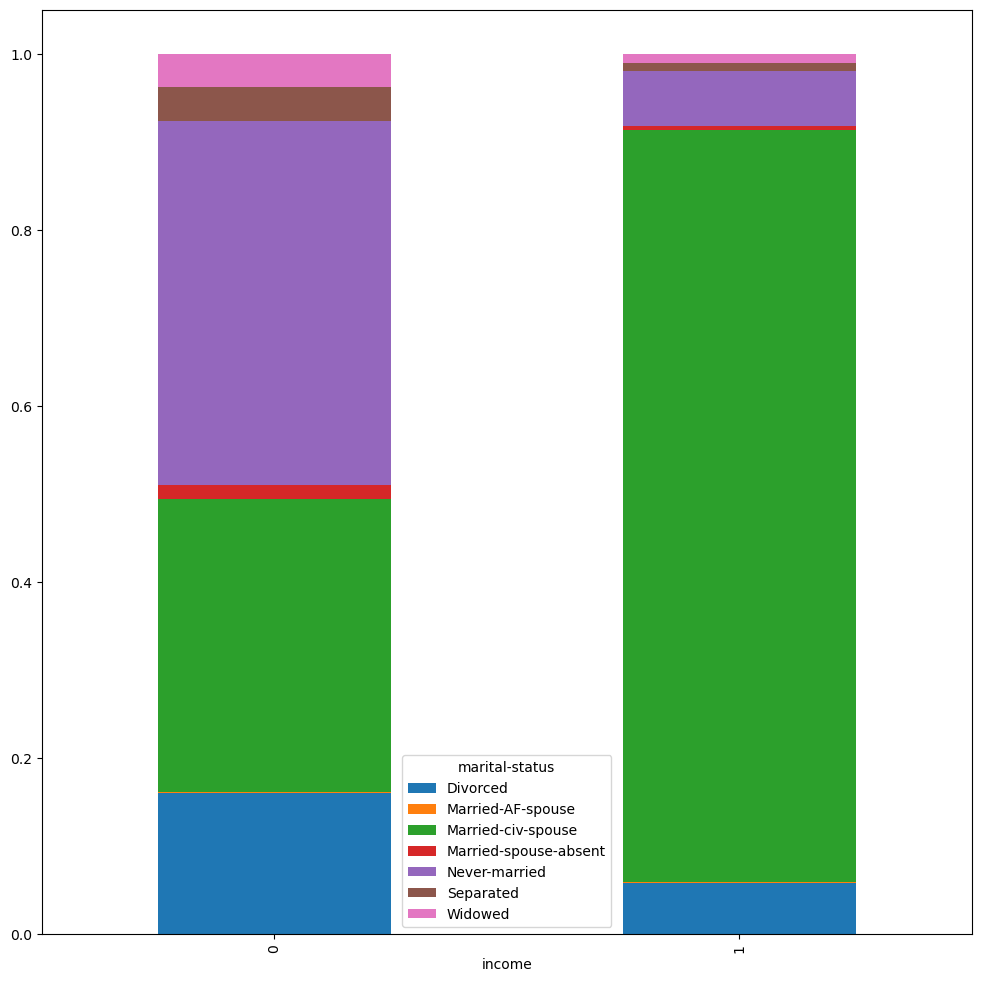

In [30]:
# comparison between marital-status and target

MaritalStatus = pd.crosstab(salary['income'],salary['marital-status'])
MaritalStatus.div(MaritalStatus.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(12, 12));

Comparando as distribuição das categorias de marital-status entre as duas classes, podemos perceber que na classe >50K há um percentual maior da classe Married-civ-spouse

In [31]:
#marital-status
 
# Transformando a variável Estad civil em casado e Não casado

salary['Married'] = salary['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 0, 'Married-civ-spouse': 1, 'Separated': 0, 'Divorced': 0,'Never-married': 0, 'Married-AF-spouse':1}).astype(int)


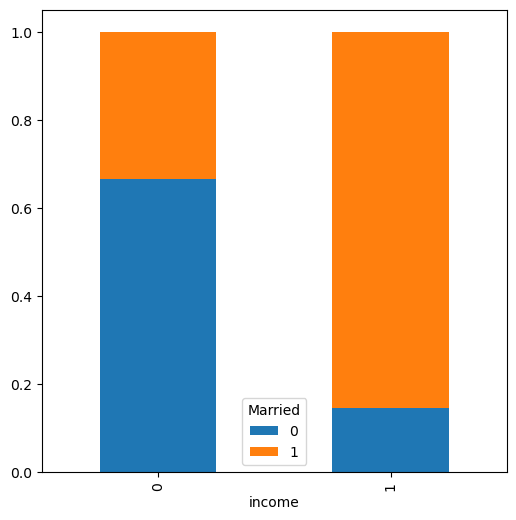

In [32]:
# comparison between marital-status and target

MaritalStatus = pd.crosstab(salary['income'],salary['Married'])
MaritalStatus.div(MaritalStatus.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

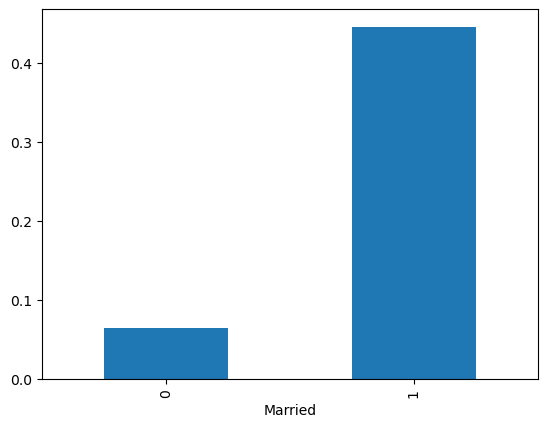

In [33]:
#plotting a bar graph for MaritalStatus  against Income to see the co-relation between these columns 
salary.groupby('Married').income.mean().plot(kind='bar');


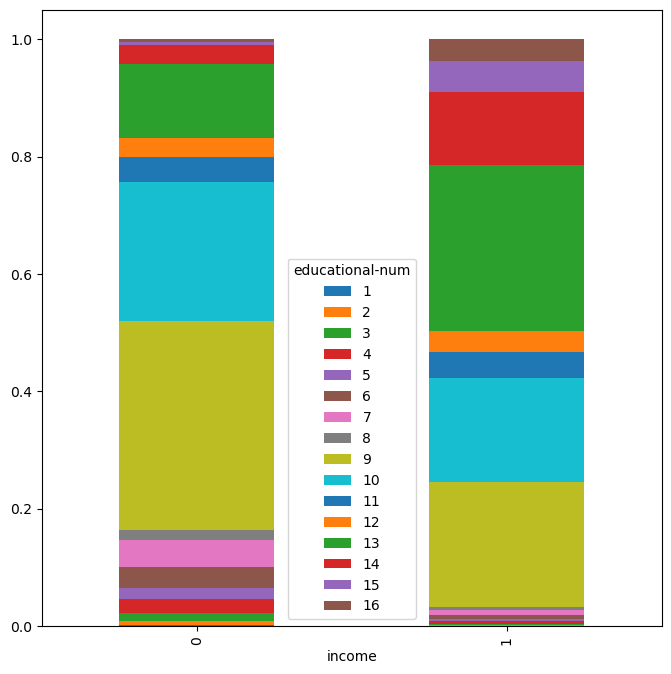

In [34]:
# comparison between educational-num  and target

Educational= pd.crosstab(salary['income'],salary['educational-num'])
Educational.div(Educational.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8, 8));
 

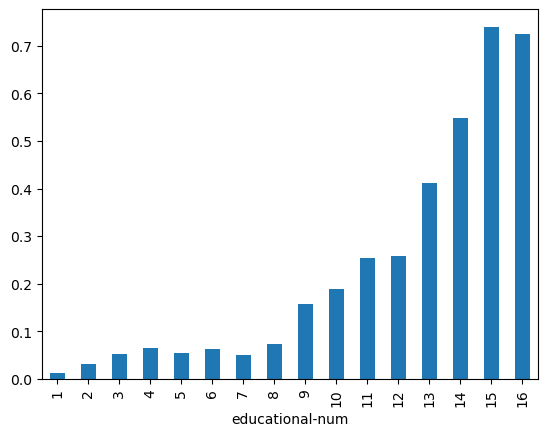

In [35]:
#plotting a bar graph for educational-num  against Income to see the co-relation between these columns 
salary.groupby('educational-num').income.mean().plot(kind='bar');

Podemos perceber penetração de renda >50K por categoria de educational-num

Vamos criar categorias conforme a força dessa penetração

In [36]:
# PRE-PROCESSAMENTO
# Vamos utilizar os algoritmos de classificação para prever os resultados, 

educa_cat = []
for dados in salary['educational-num']:
    if dados <= 8:
        educa_cat.append('0')
    elif dados == 9:
        educa_cat.append('1')
    elif dados <= 12:
        educa_cat.append('2')
    else:
        educa_cat.append("3")#atribuindo a nova variavel ao conjunto de dados
salary['educa_cat'] = educa_cat
#resultado
salary.head().T
salary['educa_cat'] = salary['educa_cat'].astype(int)



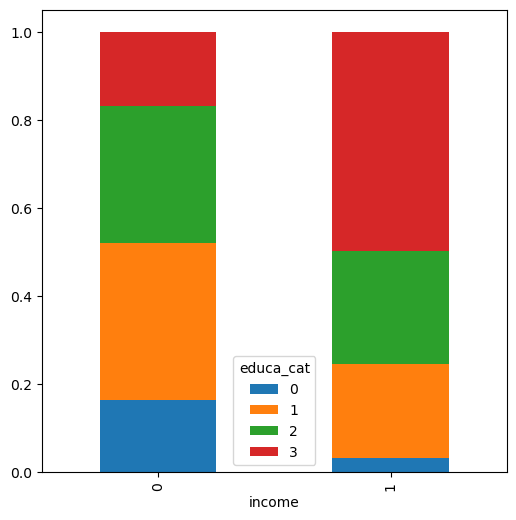

In [37]:
# comparison between educational-num  and target

Educational= pd.crosstab(salary['income'],salary['educa_cat'])
Educational.div(Educational.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));
 

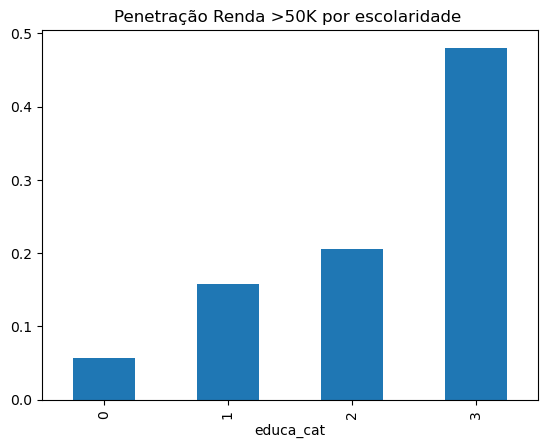

In [38]:
# plotting a bar graph for educa_cat  against Income to see the co-relation between these columns 
salary.groupby('educa_cat').income.mean().plot(kind='bar',title='Penetração Renda >50K por escolaridade ');

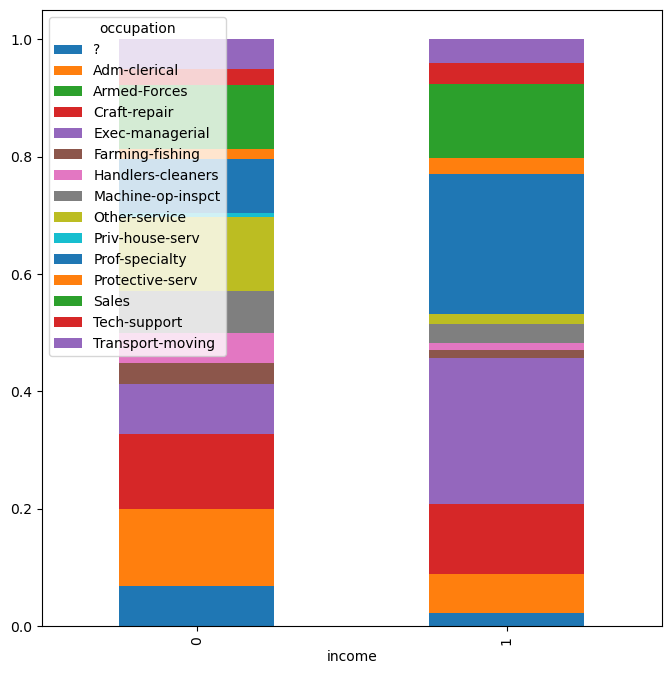

In [39]:
# comparison between educational-num  and target

Occupation= pd.crosstab(salary['income'],salary['occupation'])
Occupation.div(Occupation.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8, 8));
 

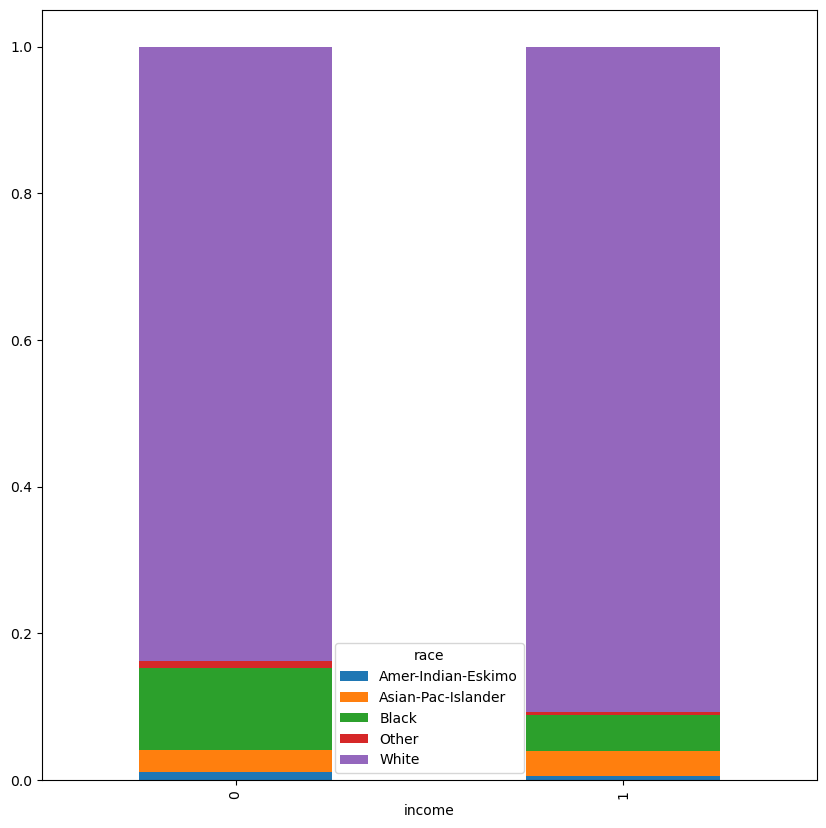

In [40]:
# comparison between race  and target

Race= pd.crosstab(salary['income'],salary['race'])
Race.div(Race.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10, 10));

In [41]:
#race
salary['race_white'] =salary['race'].map({'Black': 0, 'Asian-Pac-Islander': 0, 'Other': 0, 'White': 1, 'Amer-Indian-Eskimo': 0}).astype(int)


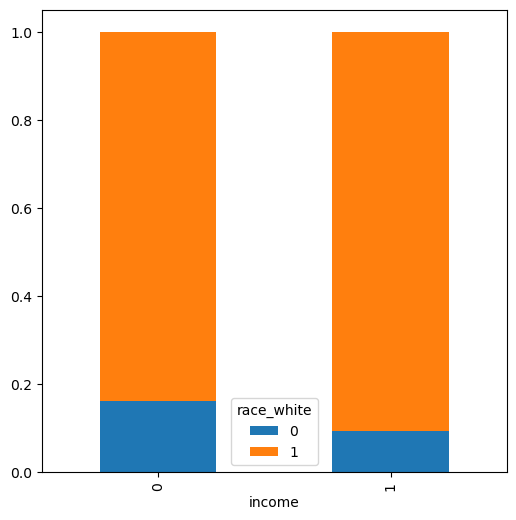

In [42]:
# comparison between race_white  and target

Race_white= pd.crosstab(salary['income'],salary['race_white'])
Race_white.div(Race_white.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

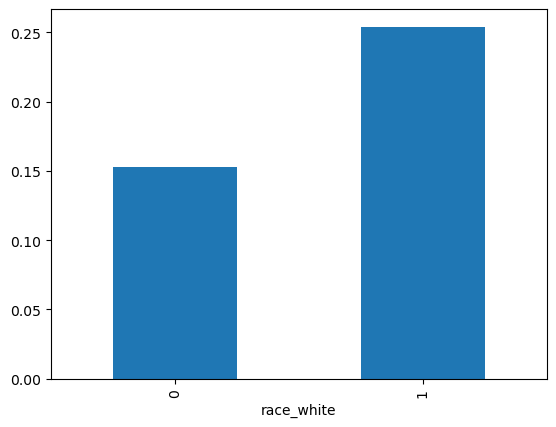

In [43]:
# plotting a bar graph for race against Income to see the co-relation between these columns 
salary.groupby('race_white').income.mean().plot(kind='bar');

In [44]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
 15  age_cat          48842 non-null  int64 
 16  Male             48842 non-null  int64 
 17  Married          48842 non-null

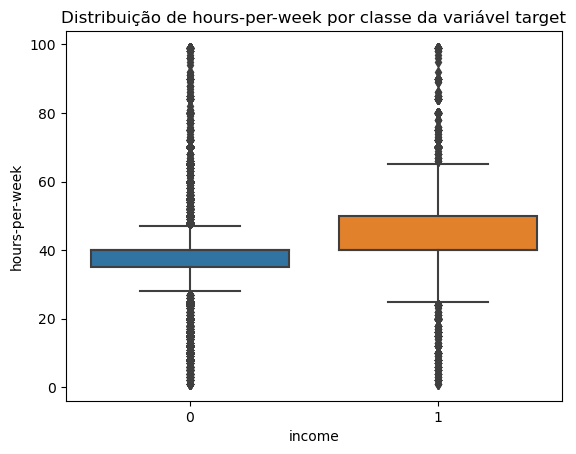

In [45]:
# Variável hours-per-week  com a variável target  (Objetivo)

import matplotlib.pyplot as plt  
sb.boxplot(x='income', y='hours-per-week', data=salary)
plt.title('Distribuição de hours-per-week por classe da variável target')
plt.show()

In [46]:
horasweek = []
for dados in salary['hours-per-week']:
    if dados < 40:
        horasweek.append('0')
    elif dados == 40:
        horasweek.append('1')
    else:
        horasweek.append("2")#atribuindo a nova variavel ao conjunto de dados
salary['horasweek'] = horasweek
#resultado
# mudar o formato da variável  
salary['horasweek'] = salary['horasweek'].astype(int)

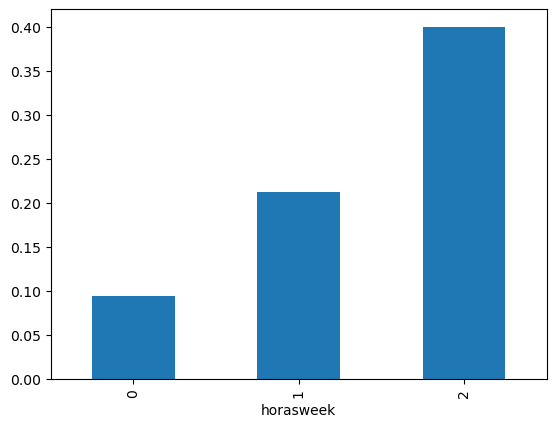

In [47]:
# plotting a bar graph for race against Income to see the co-relation between these columns 
salary.groupby('horasweek').income.mean().plot(kind='bar');

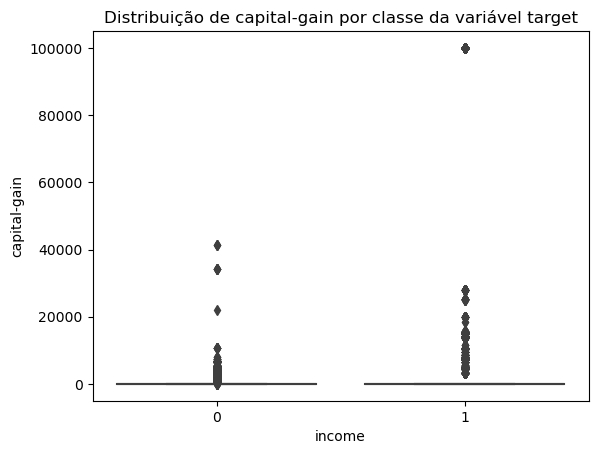

In [48]:

# Variável capital-gain  com a variável target  (Objetivo)

import matplotlib.pyplot as plt  
sb.boxplot(x='income', y='capital-gain', data=salary)
plt.title('Distribuição de capital-gain por classe da variável target')
plt.show()

In [49]:
capitalgain = []
for dados in salary['capital-gain']:
    if dados == 0:
        capitalgain.append('0')
    else:
        capitalgain.append("1")#atribuindo a nova variavel ao conjunto de dados
salary['capitalgain'] = capitalgain

# se teve ou não ganho de capital
(salary.capitalgain.value_counts() / salary.shape[0]) * 100

0    91.738668
1     8.261332
Name: capitalgain, dtype: float64

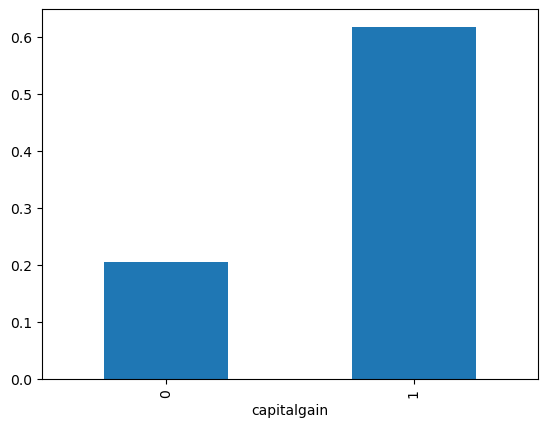

In [50]:
# plotting a bar graph for race against Income to see the co-relation between these columns 
salary.groupby('capitalgain').income.mean().plot(kind='bar');

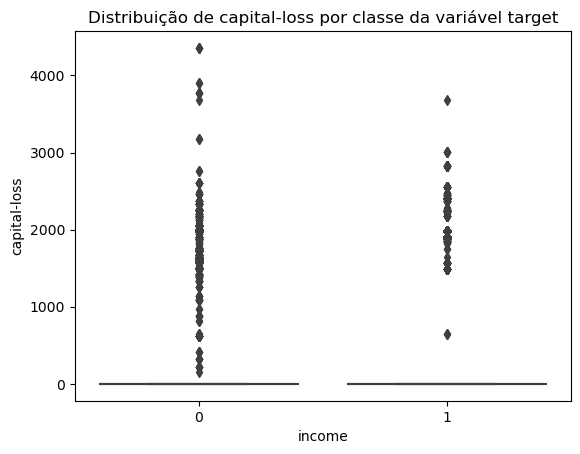

In [51]:

# Variável capital-loss  com a variável target  (Objetivo)

import matplotlib.pyplot as plt  
sb.boxplot(x='income', y='capital-loss', data=salary)
plt.title('Distribuição de capital-loss por classe da variável target')
plt.show()

In [52]:
capitalloss = []
for dados in salary['capital-loss']:
    if dados == 0:
        capitalloss.append('0')
    else:
        capitalloss.append("1")#atribuindo a nova variavel ao conjunto de dados
salary['capitalloss'] = capitalloss
#resultado

# se teve ou não perda de capital
(salary.capitalloss.value_counts() / salary.shape[0]) * 100

0    95.327792
1     4.672208
Name: capitalloss, dtype: float64

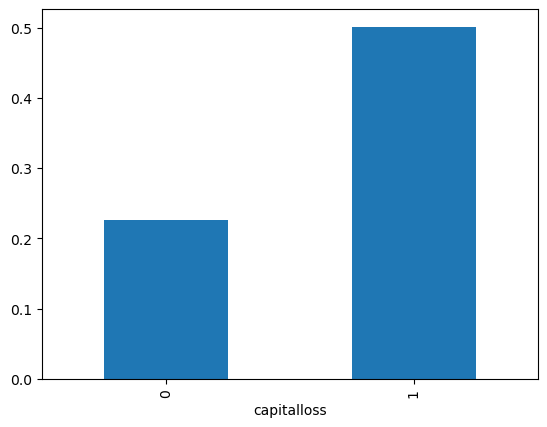

In [53]:
# plotting a bar graph for race against Income to see the co-relation between these columns 
salary.groupby('capitalloss').income.mean().plot(kind='bar');

In [54]:
check = salary.groupby(['capitalgain', 'capitalloss']).size().unstack(1)
check.head(20)

capitalloss,0,1
capitalgain,,
0,42525.0,2282.0
1,4035.0,NaN


In [55]:
# Criar uma variável gainloss no Data Frame, sendo 0 = não ganhou nem perdeu capaital , 1= ganhou ou perdeu 
salary.loc[((salary.capitalgain =='0') & (salary.capitalloss =='0')),'gainloss']='0'
salary.loc[((salary.capitalgain =='1') & (salary.capitalloss =='0')), 'gainloss']='1'
salary.loc[((salary.capitalgain =='0') & (salary.capitalloss =='1')), 'gainloss']='1'
salary.loc[((salary.capitalgain =='1') & (salary.capitalloss =='1')), 'gainloss']='1'

(salary.gainloss.value_counts() / salary.shape[0]) * 100

# mudar o formato da variável  
salary['gainloss'] = salary['gainloss'].astype(int)

In [56]:
# se teve ou não perda de capital
(salary.gainloss.value_counts() / salary.shape[0]) * 100

0    87.066459
1    12.933541
Name: gainloss, dtype: float64

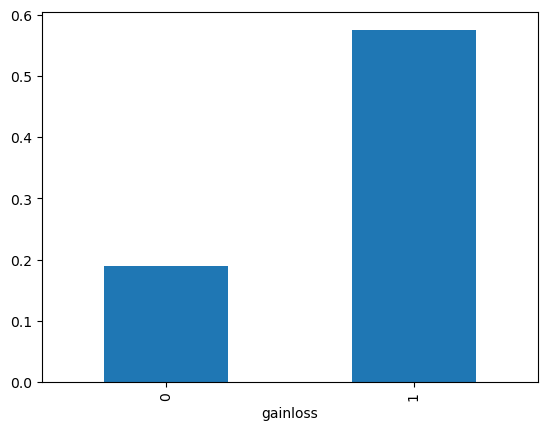

In [57]:
# plotting a bar graph for race against Income to see the co-relation between these columns 
salary.groupby('gainloss').income.mean().plot(kind='bar');

In [58]:
#informaoes das variaveis
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
 15  age_cat          48842 non-null  int64 
 16  Male             48842 non-null  int64 
 17  Married          48842 non-null

In [59]:
#dropping based on uniquiness of data from the dataset 
# A função Pandas .drop() é usada para remover colunas ou linhas especificadas.
# axis=1 representa que pretendemos descartar a própria coluna, 
# inplace=True é mencionar que estamos substituindo o dataframe original, ou seja, 
# salary pelo conjunto de dados limpo após descartar as colunas.


salary.drop(['fnlwgt','education' ,'educational-num','marital-status','relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','age_cat','capitalgain', 'capitalloss'  ], axis=1, inplace=True)

In [60]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         48842 non-null  int64 
 1   workclass   48842 non-null  object
 2   occupation  48842 non-null  object
 3   income      48842 non-null  int64 
 4   Male        48842 non-null  int64 
 5   Married     48842 non-null  int64 
 6   educa_cat   48842 non-null  int64 
 7   race_white  48842 non-null  int64 
 8   horasweek   48842 non-null  int64 
 9   gainloss    48842 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 3.7+ MB


Finalmente temos:

 Variável Target: Income (classe de renda <=50K e >50K) 
 Variáveis Preditoras: 

In [61]:
#One Hot Encoding  of the Categorical features
one_hot_workclass=pd.get_dummies(salary.workclass)
one_hot_occupation=pd.get_dummies(salary.occupation)
one_hot_marital_status=pd.get_dummies(salary.marital-status)
one_hot_relationship=pd.get_dummies(salary.relationship)   
one_hot_sex=pd.get_dummies(salary.gender)
one_hot_race=pd.get_dummies(salary.race)
one_hot_native_country=pd.get_dummies(salary.native-country)
one_hot_education=pd.get_dummies(salary.education)   


AttributeError: 'DataFrame' object has no attribute 'marital'

In [ ]:
#salary=pd.concat([salary, one_hot_workclass,one_hot_occupation, one_hot_marital_status,one_hot_occupation,one_hot_sex,one_hot_race,one_hot_native_country, one_hot_education,one_hot_relationship])
salary=pd.concat([salary, one_hot_occupation])

In [ ]:

salary

In [ ]:
salary.info()

In [ ]:

salary.head().T


In [ ]:
salary.duplicated().sum()
salary.drop_duplicates(keep=False, inplace=True)
salary.duplicated().sum()


Agora que chegamos nas variáveis de analise: Variável target income e variáveis preditoras: 

In [ ]:
salary.info()


In [ ]:
salary.describe().T

In [ ]:
# usando o classificador Naive Bayes CategoricalNB com a variável idade categorica
# 1º: Separar o conjunto em variavel resposta e variaveis de treinamento
 
   
    
X = salary.drop(['income','workclass', 'occupation'], axis=1)


y = salary['income']
X.shape, y.shape


In [ ]:
# Separating our data into features dataset (X) e target dataset(y)




In [ ]:
X.info()

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
# Verificando a existencia de valores ausentes(missing)

X.isnull().sum()


In [ ]:
y.fillna(y.mode()[0],inplace=True)

In [ ]:
#Split the data into 70% training and 30% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

XGBoost

In [ ]:
# Applying XGBoost
# The data is stored in a DMatrix object
# label is used to define our outcome variable
import xgboost as xgb


dtrain=xgb.DMatrix(X_train, label=y_train)
dtest=xgb.DMatrix(X_test, label=y_test)



In [ ]:
# setting parameters for xgboost
parameters={'max_depth':5,  'eta':1, 'silente':1, 'objective':'binary:logistic',
'eval_matrix': 'auc', 'learning_rate':.05}


In [ ]:
# training our model
num_round=50
from datetime import datetime
start = datetime.now()

xg=xgb.train(parameters, dtrain, num_round)
stop=datetime.now()
#Execution time of the model
execution_time_xgb = stop-start


In [ ]:
#now predicting our model on dataset

y_pred =xg.predict(dtest)
y_pred.size


In [ ]:
# converting probabilities into 1 or 0

for i in range(0,14653):
      if y_pred[i]>0.5:    #setting threshold to 0.5
          y_pred[i]=1
      else:
           y_pred[i]=0


In [ ]:
#calculating accuracy of our model

from sklearn.metrics import accuracy_score
accuracy_xgb=accuracy_score(y_test,y_pred)
accuracy_xgb

 

In [ ]:
from sklearn.metrics import roc_auc_score
#calculating roc_auc for xgboost
auc_xgb = roc_auc_score(y_test, y_pred)
auc_xgb


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)
print(cm)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

LightGBM

In [ ]:
#Light GBM
train_data=lgb.Dataset(X_train, label=y_train)
 
test_data = lgb.Dataset(X_test, label=y_test)

In [ ]:
train_data

In [ ]:
# setting parameters for Lightgbm
params = {'num_leaves':150, #número padrão=31
'objective':'binary',
'max_depth':7,
'learning_rate':.05,
'max_bin':200}
params['metric'] = ['auc', 'binary_logloss']





In [ ]:

params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}


In [ ]:
params

In [ ]:
# Where we have set max _depth in xgb and lightGBM to 7  to have a fair comparison between the two.

#training our model using LightGBM
num_round=50
start=datetime.now()
model = lgb.train(params, train_data)


stop=datetime.now()
#execution time of the model
execution_time_lgbm=stop-start
execution_time_lgbm

In [ ]:
#predicting on test set
y_pred2=model.predict(X_test)
y_pred2[0:5]  #showing first´s predictions


In [ ]:
y_pred2.size




In [ ]:
#converting probabilities into 0 or 1
for i in range(0,14653):
      if y_pred2[i]>0.5:    #setting threshold to 0.5
          y_pred2[i]=1
      else:
           y_pred2[i]=0

In [ ]:
#calculating accuracy
accuracy_lgbm = accuracy_score(y_pred2,y_test)
accuracy_lgbm
 

In [ ]:
y_test.value_counts()


Comparing XGBoost x LightGBM


In [ ]:
#calculating roc_auc for xgboost
auc_lgbm = roc_auc_score(y_test, y_pred2)
auc_lgbm

In [ ]:
aux_lgbm = comparison_dct = {'accuracy score': (accuracy_lgbm, accuracy_xgb), 'auc_score':  (auc_lgbm, auc_xgb),'execution_time': (execution_time_lgbm, execution_time_xgb)}

aux_lgbm


In [ ]:
import pandas as DataFrame


# creating a dataset ‘comparison_df’ for comparing of LightGBM e XGB

comparison_df = pd.DataFrame(aux_lgbm)
comparison_df.index=['LightGBM','XGBBoost']
comparison_df

In [ ]:
!pip install shap


import shap


In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [ ]:

shap.summary_plot(shap_values, X)